<a href="https://colab.research.google.com/github/stephenmartin2951/SE-Group2-Implementation/blob/main/John_Barfield3_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [26]:
%%shell
jupyter nbconvert --to html /bin/John_Barfield3_Full_Code.ipynb

[NbConvertApp] Converting notebook /bin/John_Barfield3_Full_Code.ipynb to html
[NbConvertApp] Writing 1426542 bytes to /bin/John_Barfield3_Full_Code.html


In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Add the filename to the path
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape

(1898, 9)

#### Observations: (1898, 9)


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Data types: int64, object, and float64.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are zero null values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe()
# the statsitcal summary of the minimum, average(mean), and maximum time it takes for food to be prepared once the order is placed is under the column food_preperation_time.

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
Min: 20.0 Max: 35.0, and the Mean: 27.37


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df.rating.value_counts()
# the amount of orders that are not rated: 736


,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
The amount of orders that aren't rated:736


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

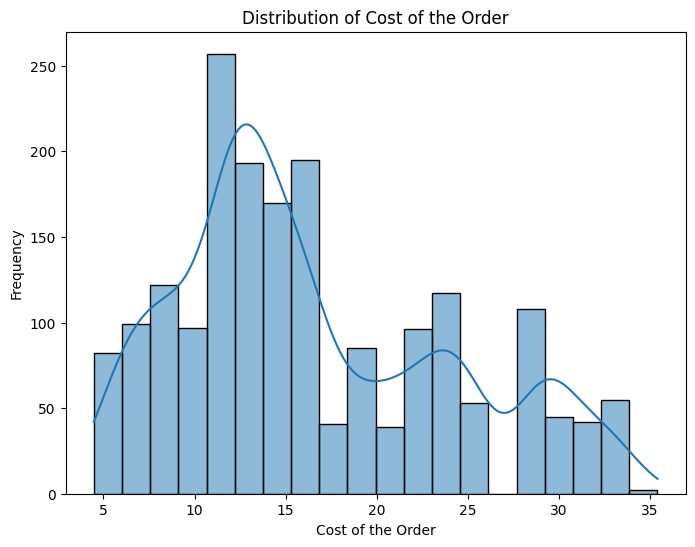

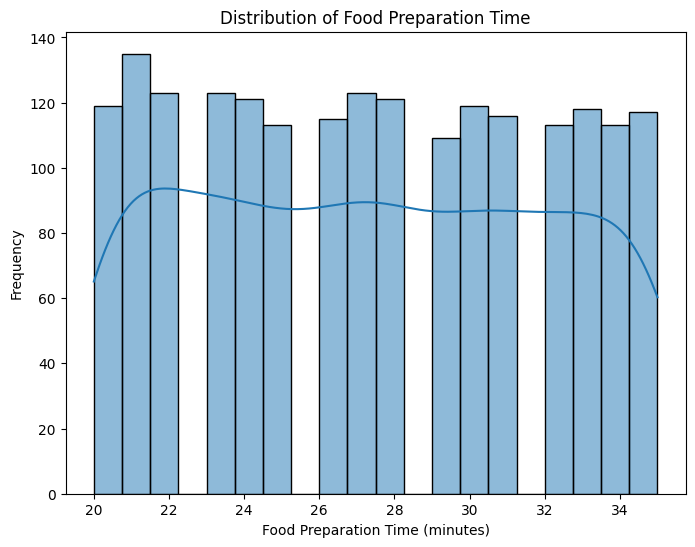

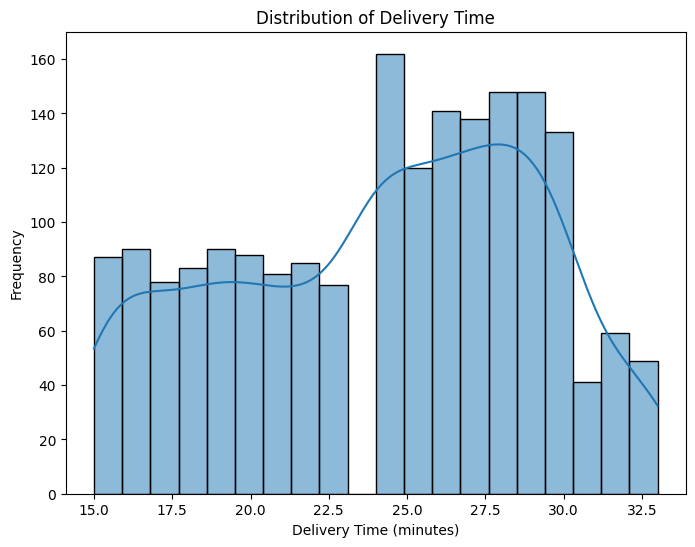

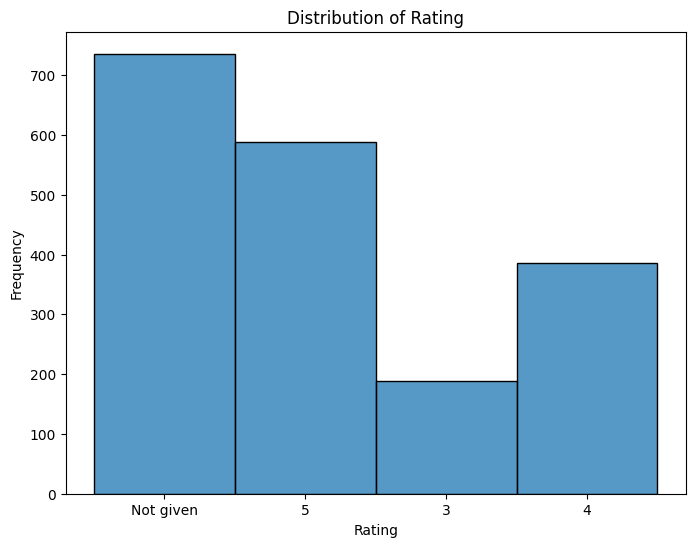

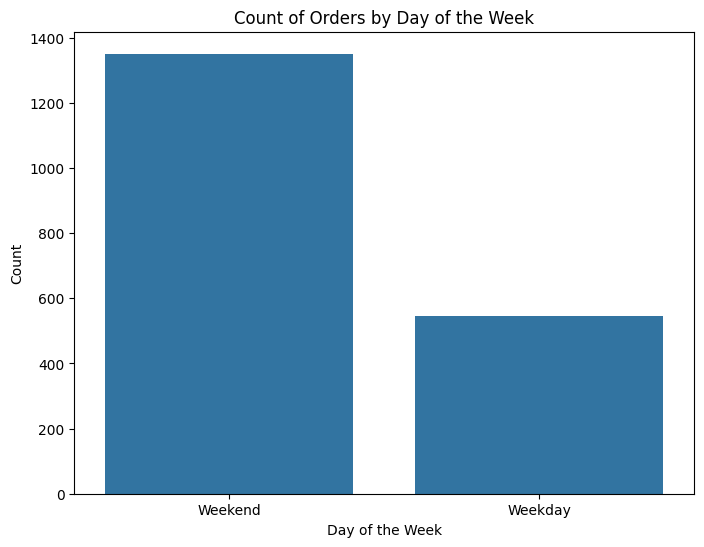

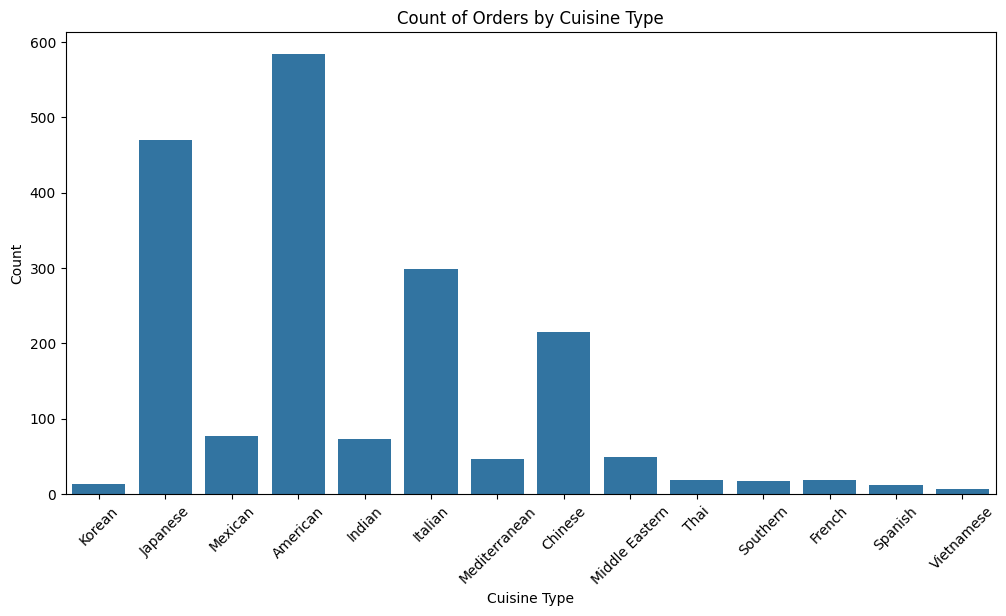

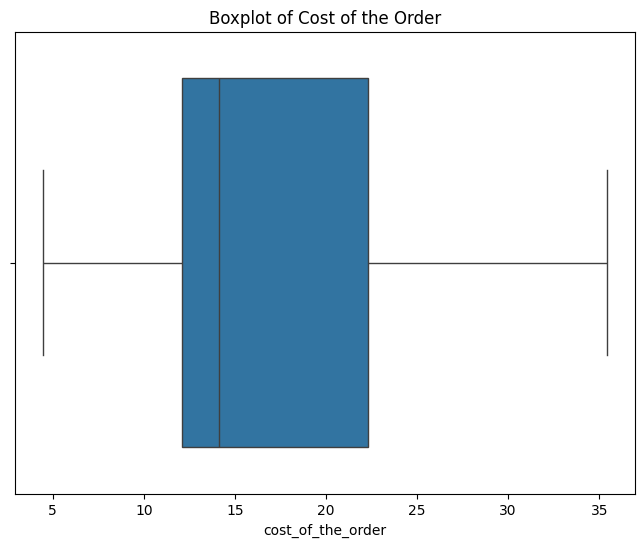

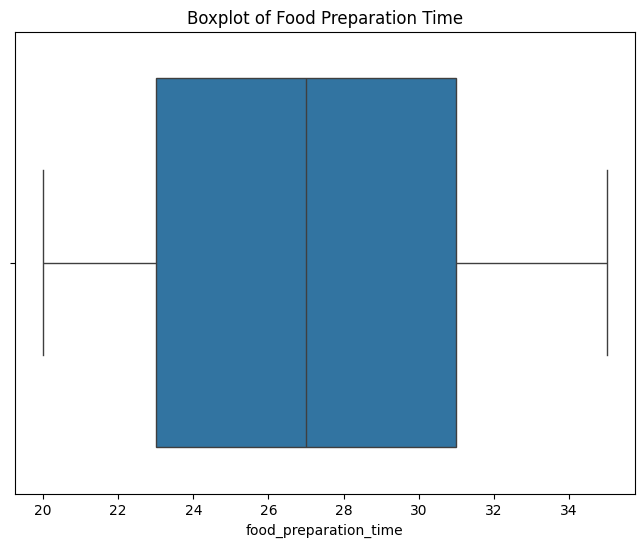

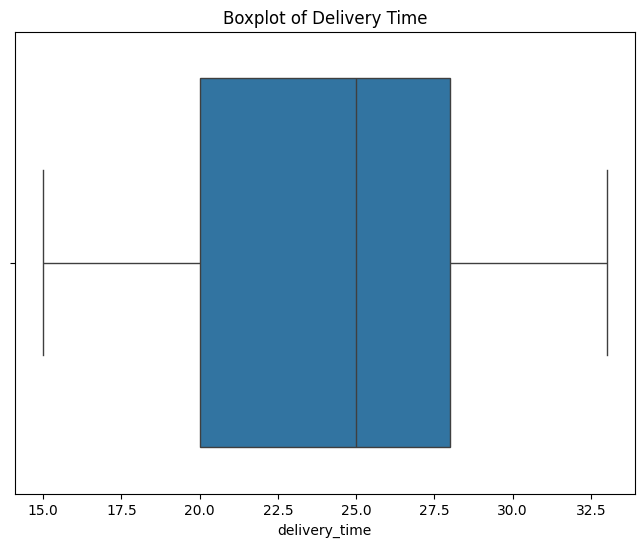

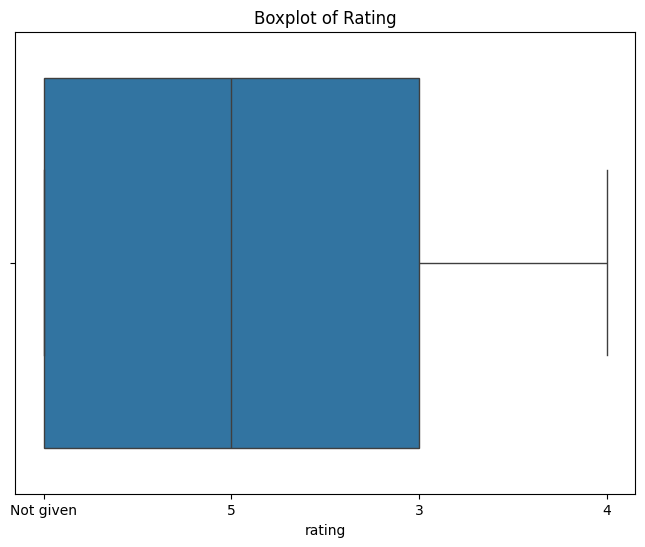

In [ ]:


# Distribution of 'cost_of_the_order'
plt.figure(figsize=(8, 6))
sns.histplot(df['cost_of_the_order'], bins=20, kde=True)
plt.title('Distribution of Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'food_preparation_time'
plt.figure(figsize=(8, 6))
sns.histplot(df['food_preparation_time'], bins=20, kde=True)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'delivery_time'
plt.figure(figsize=(8, 6))
sns.histplot(df['delivery_time'], bins=20, kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'rating'
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=5, kde=False)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Countplot for 'day_of_the_week'
plt.figure(figsize=(8, 6))
sns.countplot(x='day_of_the_week', data=df)
plt.title('Count of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

# Countplot for 'cuisine_type'
plt.figure(figsize=(12, 6))
sns.countplot(x='cuisine_type', data=df)
plt.title('Count of Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Boxplot for 'cost_of_the_order'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['cost_of_the_order'])
plt.title('Boxplot of Cost of the Order')
plt.show()

# Boxplot for 'food_preparation_time'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['food_preparation_time'])
plt.title('Boxplot of Food Preparation Time')
plt.show()

# Boxplot for 'delivery_time'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['delivery_time'])
plt.title('Boxplot of Delivery Time')
plt.show()

# Boxplot for 'rating'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['rating'])
plt.title('Boxplot of Rating')
plt.show()



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_5_restaurants)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
The top 5 restaurants: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
most_popular_cuisine_weekend = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmax()
print(most_popular_cuisine_weekend)

American


#### Observations:
American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
orders_above_20 = df[df['cost_of_the_order'] > 20]['order_id'].count()
total_orders = df['order_id'].count()
percentage_above_20 = (orders_above_20 / total_orders) * 100
print(f"{percentage_above_20:.2f}%")


29.24%


#### Observations:
29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
mean_delivery_time = df['delivery_time'].mean()
print(mean_delivery_time)


24.161749209694417


#### Observations:
Mean of order delivery time: 24.161749209694417


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
top_3_customers = df['customer_id'].value_counts().head(3)
print(top_3_customers)


customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


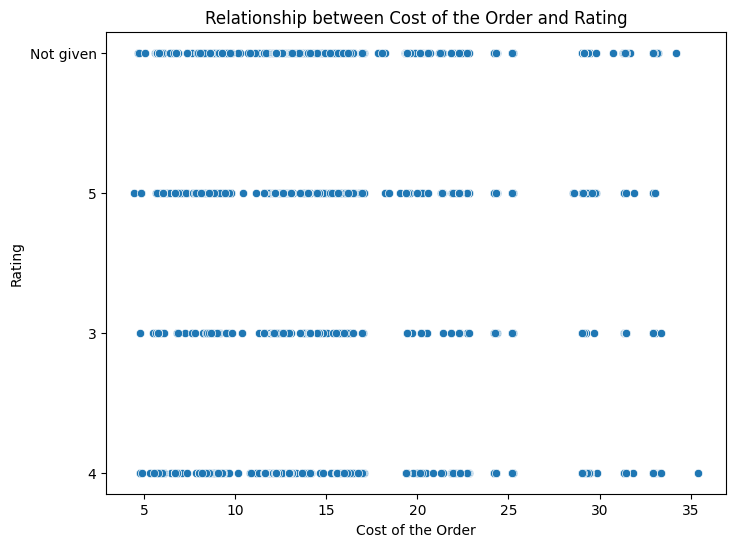

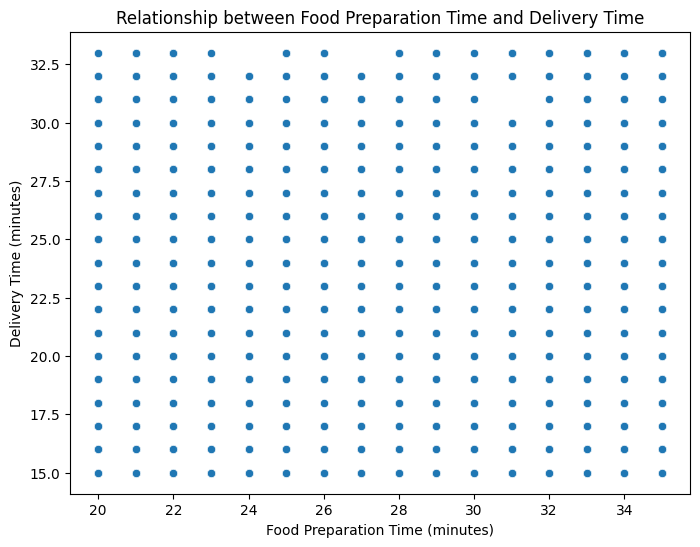

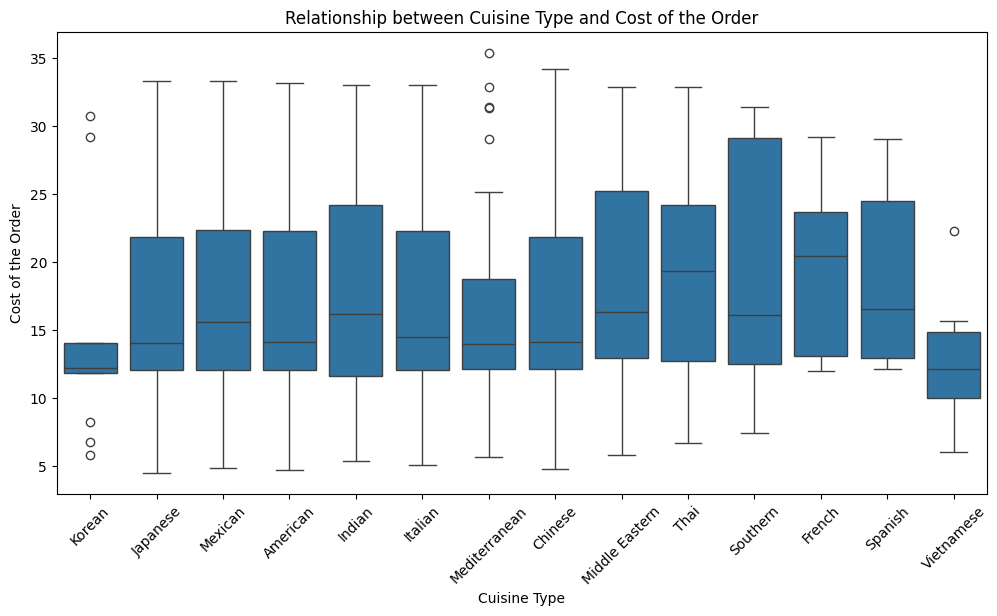

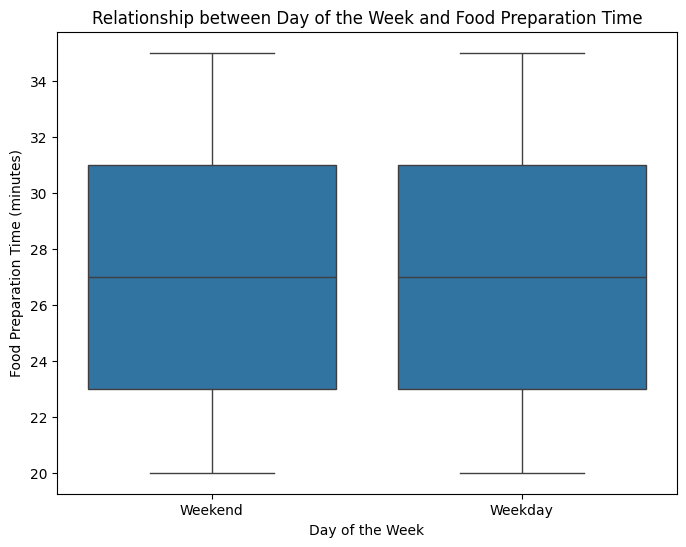

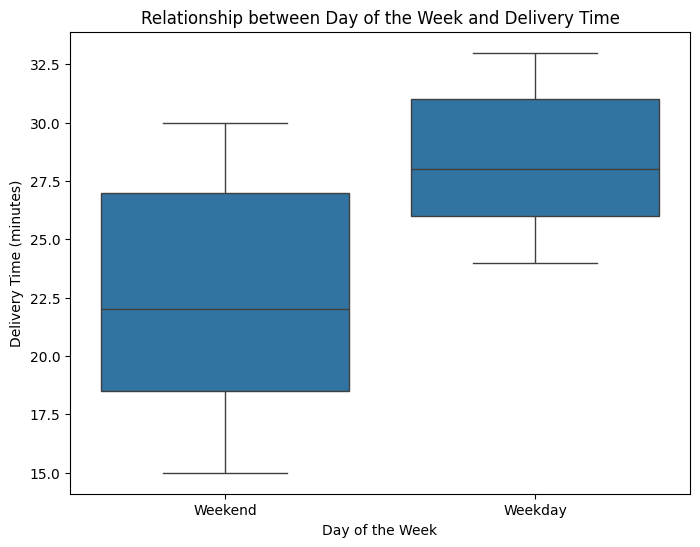

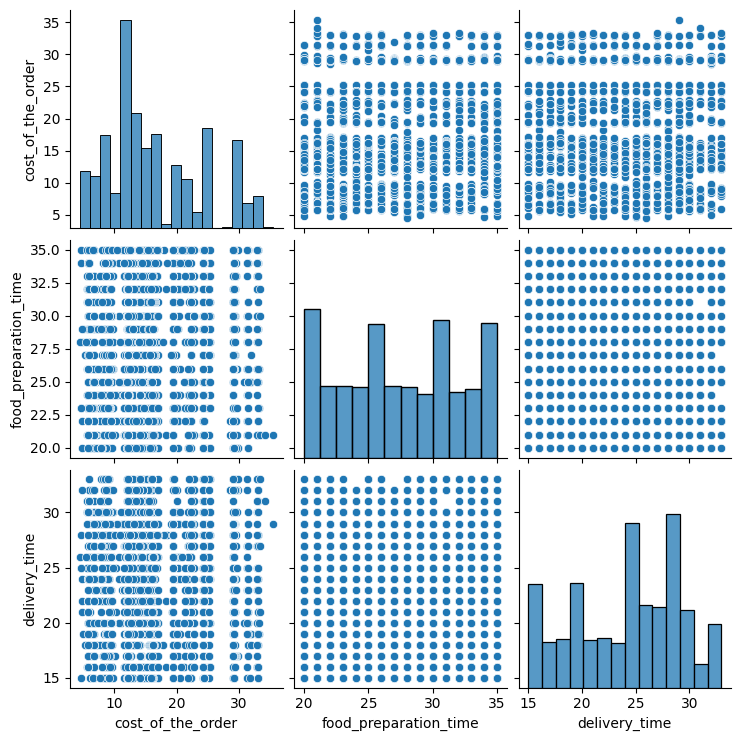

In [ ]:
# Relationship between cost_of_the_order and rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cost_of_the_order', y='rating', data=df)
plt.title('Relationship between Cost of the Order and Rating')
plt.xlabel('Cost of the Order')
plt.ylabel('Rating')
plt.show()

# Relationship between food_preparation_time and delivery_time
plt.figure(figsize=(8, 6))
sns.scatterplot(x='food_preparation_time', y='delivery_time', data=df)
plt.title('Relationship between Food Preparation Time and Delivery Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

# Relationship between cuisine_type and cost_of_the_order
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.title('Relationship between Cuisine Type and Cost of the Order')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=45)
plt.show()

# Relationship between day_of_the_week and food_preparation_time
plt.figure(figsize=(8, 6))
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data=df)
plt.title('Relationship between Day of the Week and Food Preparation Time')
plt.xlabel('Day of the Week')
plt.ylabel('Food Preparation Time (minutes)')
plt.show()

# Relationship between day_of_the_week and delivery_time
plt.figure(figsize=(8, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Relationship between Day of the Week and Delivery Time')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.show()


# Pairplot
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']])
plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Recalculate restaurant_ratings after conversion
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter restaurants with more than 50 ratings and average rating greater than 4
promotional_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

# Print the restaurants fulfilling the criteria
print(promotional_restaurants)

                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:
                          count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
def calculate_revenue(row):
  if row['cost_of_the_order'] > 20:
    return row['cost_of_the_order'] * 0.25
  elif row['cost_of_the_order'] > 5:
    return row['cost_of_the_order'] * 0.15
  else:
    return 0

# Apply the function to each row
df['revenue'] = df.apply(calculate_revenue, axis=1)

# Calculate the total revenue
total_revenue = df['revenue'].sum()

# Print the total revenue
print(f"Net revenue generated by the company: ${total_revenue:.2f}")


Net revenue generated by the company: $6166.30


#### Observations:
Net revenue generated by the company: $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate total delivery time
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders taking more than 60 minutes
orders_over_60_minutes = df[df['total_delivery_time'] > 60]['order_id'].count()
total_orders = df['order_id'].count()
percentage_over_60_minutes = (orders_over_60_minutes / total_orders) * 100

# Print the result
print(f"{percentage_over_60_minutes:.2f}%")


10.54%


#### Observations:
10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Calculate the mean delivery time for weekdays and weekends
weekday_delivery_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
weekend_delivery_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# Print the results
print(f"Mean delivery time on weekdays: {weekday_delivery_time:.2f} minutes")
print(f"Mean delivery time on weekends: {weekend_delivery_time:.2f} minutes")


Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes


#### Observations:
Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
### **Higher Demand or Traffic on Weekdays**
Insight: The higher delivery time on weekdays suggests that there might be higher demand for deliveries, more traffic, or logistical challenges during those times.


### **Operational Efficiency on Weekends**
Insight: The lower delivery time on weekends indicates better performance or lower traffic, suggesting fewer bottlenecks or less congestion.


### **Customer Experience Impact**
Insight: Longer delivery times during weekdays might affect customer satisfaction. Customers may expect quicker service during busy weekdays as they may be ordering food or essentials during working hours or busy schedules.


### **Ratings**
The most frequent value is "Not given" (i.e., no rating was provided). This bar is the highest, meaning a significant number of orders did not have ratings associated with them. 5-Star Ratings: The second most common rating is a 5-star rating, indicating that many customers who rated their orders gave the highest score. Other Ratings: A smaller portion of customers gave ratings of 4 stars. Very few customers rated their orders as 3 stars.







### **Conclusions**
### **Distributuion vs Cuisine Type **
American cuisine has the highest number of orders, with close to 600 orders. This suggests that American cuisine is the most in-demand among customers using the platform. Japanese cuisine also has a high count, with over 400 orders, making it the second most popular cuisine. Moderate Popularity: Italian and Chinese cuisines have a moderate number of orders. These cuisines are also relatively popular, with around 300 orders each. Less Popular Cuisines: Mexican, Indian, and Mediterranean cuisines have much lower order counts, with around 100-150 orders. These cuisines are not as popular as American or Japanese but still attract a noticeable number of customers. Low Popularity: Several cuisines like Korean, Middle Eastern, Thai, Southern, French, Spanish, and Vietnamese have very low order counts, ranging from just a few to around 50 orders each. These cuisines may not be as widely available or popular with the platform's customer base.#


### **Distribution by Day**
Significantly Higher Orders on the Weekend: The plot shows a much higher number of orders placed on the weekend compared to weekdays. The number of orders on the weekend is close to 1,400, which indicates that weekends see a higher demand for food delivery. Lower Orders on Weekdays: The count of orders during the weekdays is significantly lower, with fewer than 600 orders. This is less than half of the weekend order volume.

### Recommendations:
### **Higher Demand or Traffic on Weekdays**
Action: Investigating whether more drivers or additional logistical support is needed on weekdays to improve efficiency.

### **Operational Efficiency on Weekends**
Action:Businesses could explore strategies to replicate this efficiency during weekdays by adjusting delivery routes, using predictive analytics for peak hours, or shifting some deliveries to off-peak times.

### **Customer Experience Impact**
Action:Improving weekday delivery times could enhance customer retention and satisfaction.

### **Ratings**
 Would be to increase customer engagment. Find a way to get them to rate their experience more often, because the most of the expereince from customers aren't getting rated. This would get more of a accurate representation of how buisness is going.

### **Distrubution According to Cuisine Type**
American and Japanese cuisines are driving the most buisness out of all cuisine types. Italian and Chinese cuisine types are perfoming at a moderate level, and the less popular cuisine types such as Korean and Vietnamese need more promotion and opportunity for avaliblity expantion.

### **Distribution by Day**
The customers prefer to order food on the weekend, because they may have mor time and are socializing during that time, so it may be best to have promotions on the weekends, to drive more sales.

### **Frequency Vs Delivery Time **
Focus on streamlining operations in this time range to ensure consistent performance. This might involve:
Route optimization: Use AI and machine learning models to optimize routes during peak times to consistently hit the 25-minute mark.
Driver training: Provide training to drivers for route efficiency and time management to maintain consistency in this range.
Capacity management: Ensure proper allocation of drivers and resources during peak times to maintain high efficiency.



---